In [7]:
import os
import random
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# as in .yaml file
class_names = [
  "Rutting",
  "Reflective & Transverse Crack",
  "Block Crack",
  "Longitudinal Crack",
  "Alligator Crack",
  "Patching",
  "Potholes",
  "Bleeding",
  "Corrugation",
  "Raveling & Weathering",
  "Bumps & Sags"
]

In [12]:
palette = plt.get_cmap('tab20').colors
colors = [tuple(int(c * 255) for c in palette[i % len(palette)]) for i in range(len(class_names))]

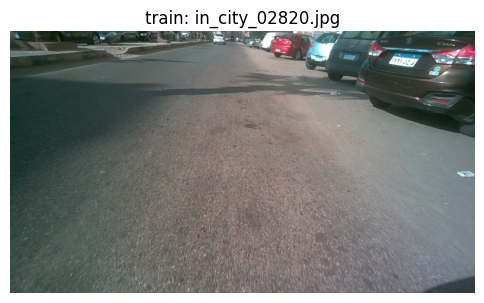

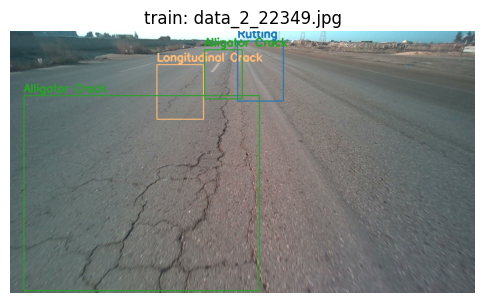

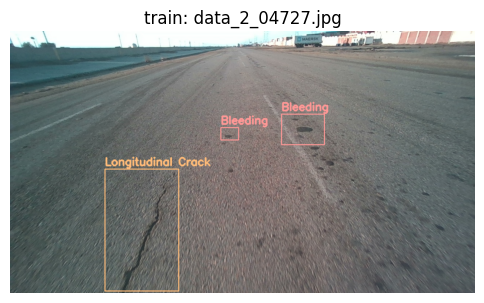

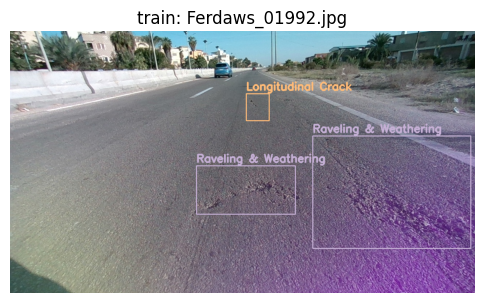

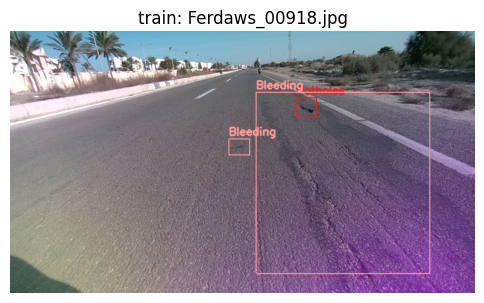

In [ ]:
# Choose which split to visualize: "train", "val", or "test"
split = "train"

# Root dataset directory
dataset_dir = "../../data/EGY_PDD"
images_dir = f"{dataset_dir}/images/{split}"
labels_dir = f"{dataset_dir}/labels/{split}"



# Collect all image files (.jpg or .png)
all_images = [f for f in os.listdir(images_dir) if f.lower().endswith(('.jpg', '.png'))]

# Pick random samples
sample_images = random.sample(all_images, 5)

for img_name in sample_images:
    img_path = os.path.join(images_dir, img_name)
    label_name = os.path.splitext(img_name)[0] + ".txt"
    label_path = os.path.join(labels_dir, label_name)

    # Load the image
    img = cv2.imread(img_path)
    if img is None:
        print(f"⚠️ Could not read {img_name}")
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    H, W, _ = img.shape

    # Draw bounding boxes if label exists
    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            for line in f.readlines():
                parts = line.strip().split()
                if len(parts) != 5:
                    continue
                cls, x_center, y_center, w, h = map(float, parts)
                cls = int(cls)
                x1 = int((x_center - w / 2) * W)
                y1 = int((y_center - h / 2) * H)
                x2 = int((x_center + w / 2) * W)
                y2 = int((y_center + h / 2) * H)

                color = colors[cls] if cls < len(colors) else (255, 255, 255)
                cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
                label = class_names[cls] if cls < len(class_names) else f"class {cls}"
                cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.0, color, 3)
    else:
        print(f"No label found for {img_name}")

    # Show the image
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(f"{split}: {img_name}")
    plt.axis("off")
    plt.show()
